# **TASK 1 : Data Preparation and Customer Analytics**

### **The goal of our task is to find the types of customers who purchase Chips and their purchasing behaviour within the region.**

## 1.**Importing Libraries**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from dateutil.rrule import rrule, DAILY
import numpy as np
import re


%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)
pd.pandas.set_option('display.max_columns',None)



---


## 2. **Exploratory Data Analysis**

In [2]:
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")
print(transaction_data.shape)
transaction_data.head()

(264836, 8)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase_data = pd.read_csv("QVI_purchase_behaviour.csv")
print(purchase_data.shape)
purchase_data.head()

(72637, 3)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


#### 2.1 **Merging the Transaction and Purchase Dataset** 



In [4]:
df = pd.merge(transaction_data,purchase_data,on="LYLTY_CARD_NBR",how="right")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [5]:
df.shape

(264836, 10)

In [6]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### 2.2 **Handling the Column DATE**




The Column DATE has a unique values of 364 which is number of dates in a year, The column is not in a specific order so I'm going to short the column in ascendig order and going to assign a series of dates to the column so that it will be helpful in TimeSeries Data Analysis.

In [7]:
# Sorting the Data Column
df.sort_values("DATE",ignore_index=True,inplace=True)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43282,78,78115,76138,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
1,43282,220,220035,219501,81,Pringles Original Crisps 134g,2,7.4,YOUNG SINGLES/COUPLES,Mainstream
2,43282,141,141141,142377,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Mainstream
3,43282,59,59307,55832,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream
4,43282,39,39086,35147,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,OLDER SINGLES/COUPLES,Mainstream


In [8]:
len(df["DATE"].unique())

364

As you see the DATE column has a unique list of 364 values (Days in a Year except missing one, may be a holiday) so we need to assign each value a year's range of dates.

**Let me assume that the dates start from 2020-01-01 t0 2020-12-29**

In [9]:
# Creating Dates
start_date = date(2020,1,1)
end_date = date(2020,12, 29)

replace_dates = []
for dt in rrule(DAILY, dtstart=start_date, until=end_date):
    dates = dt.strftime("%Y-%m-%d")
    replace_dates.append(dates)

In [10]:
len(replace_dates)

364

In [11]:
#Replacing the DATE columns unique values with a date
df["DATE"] = df["DATE"].replace(df["DATE"].unique(),replace_dates)
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2020-01-01,78,78115,76138,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
1,2020-01-01,220,220035,219501,81,Pringles Original Crisps 134g,2,7.4,YOUNG SINGLES/COUPLES,Mainstream
2,2020-01-01,141,141141,142377,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Mainstream
3,2020-01-01,59,59307,55832,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream
4,2020-01-01,39,39086,35147,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,OLDER SINGLES/COUPLES,Mainstream


In [12]:
df.shape

(264836, 10)

#### 2.3 **Handling the Product Name Column**




In [13]:
df["PROD_NAME"].value_counts()[0:10]

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: count, dtype: int64

##### 2.3.3 **Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips**

Getting only the Products that are Chips

In [14]:
df = df[df["PROD_NAME"].str.contains("Chips|Chip|Chps")]
df.shape

(84150, 10)

###### 2.3.4 **Removing Special Characters in a string**




In [15]:
df["PROD_NAME"] = df["PROD_NAME"].str.replace("[#,@,&]", "")
df["PROD_NAME"] = df["PROD_NAME"].str.replace("  ", "")

df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
5,2020-01-01,28,28041,24771,2,Cobs Popd Sour Crm&Chives Chips 110g,2,7.6,OLDER FAMILIES,Budget
7,2020-01-01,199,199028,197676,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Budget
14,2020-01-01,133,133114,136713,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,OLDER SINGLES/COUPLES,Budget
22,2020-01-01,271,271204,269423,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,OLDER SINGLES/COUPLES,Mainstream
24,2020-01-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,RETIREES,Premium


In [16]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,84150,84150.000000,8.415000e+04,84150.000000,84150.000000,84150.000000,84150.000000
mean,2020-06-30 08:50:27.850267648,135.427166,1.359021e+05,135506.277481,51.688770,1.905585,7.082680
min,2020-01-01 00:00:00,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,2020-04-01 00:00:00,70.000000,7.010000e+04,68057.250000,22.000000,2.000000,6.000000
50%,2020-06-29 00:00:00,131.000000,1.312865e+05,135616.000000,44.000000,2.000000,6.600000
75%,2020-09-29 00:00:00,203.000000,2.032330e+05,203265.500000,79.000000,2.000000,8.800000
max,2020-12-29 00:00:00,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000
std,NaN,76.808415,8.065460e+04,78024.245101,33.893817,0.341417,2.269117


## 3. **Checking for Outliears**

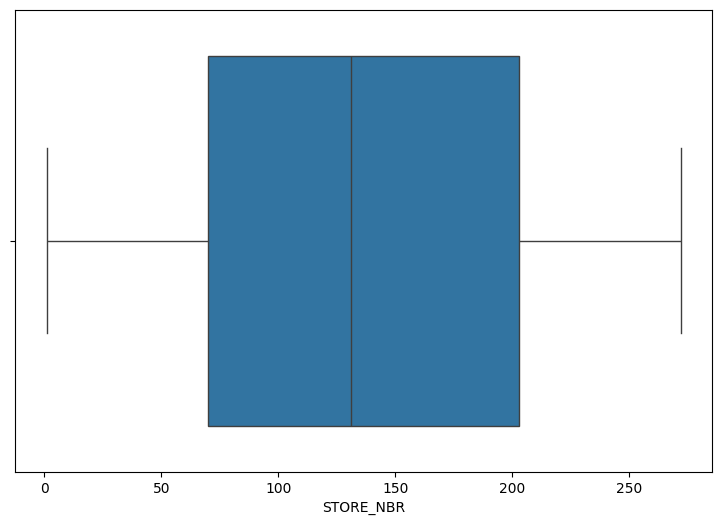

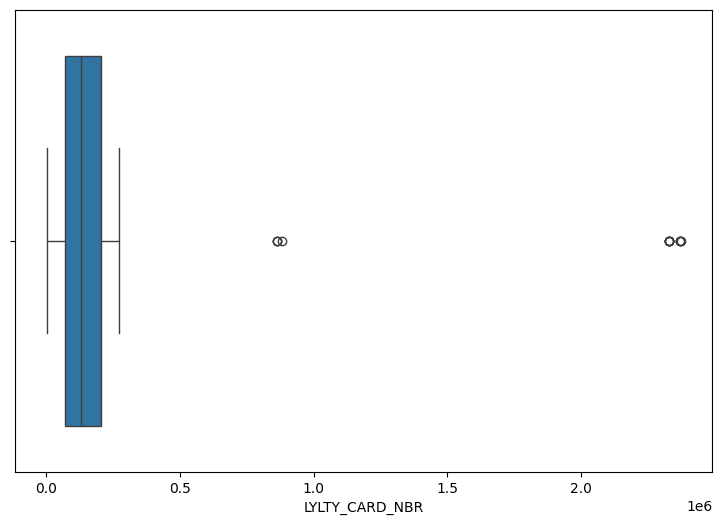

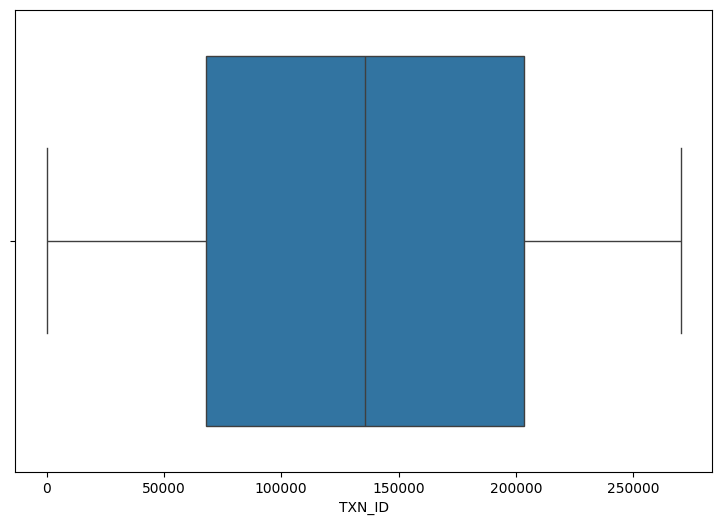

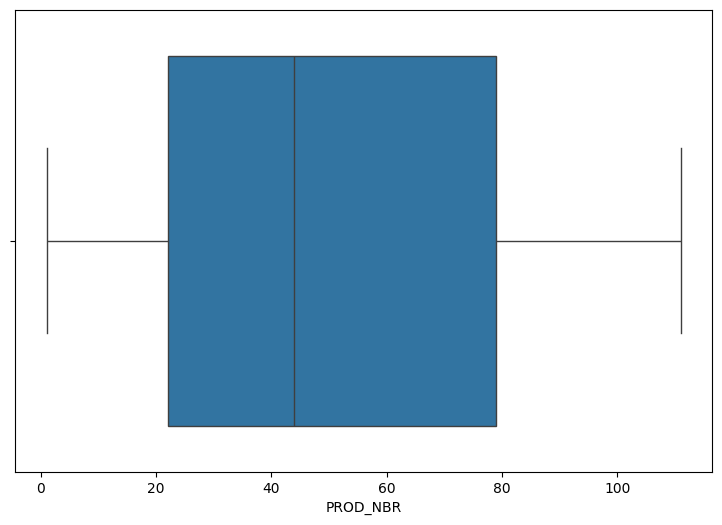

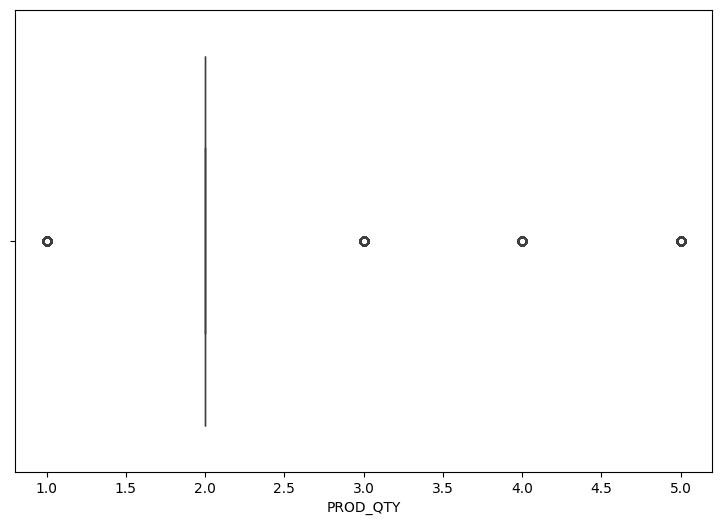

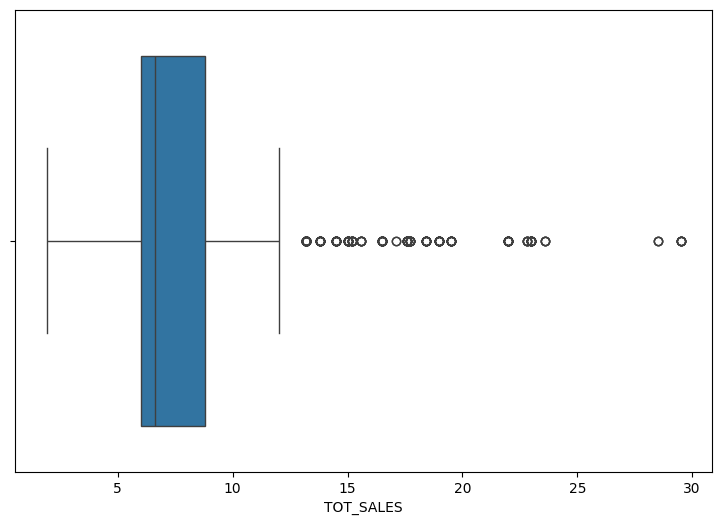

In [17]:
for val in df.columns:
  if val== "DATE":
    continue
  elif df[val].dtype == "O":
    continue
  else:
    sns.boxplot(x = val, data=df)
    plt.show()

#### 3.1 **Removing Outliers using IQR**

In [18]:
 def outliers_IQR(val): 
  q1 = df[val].quantile(0.25)
  q3 = df[val].quantile(0.75)
  IQR = q3 - q1

  Lower_whisk = q1 - 1.5 * IQR
  Upper_whisk = q3 + 1.5 * IQR

  print("NAME:",val)
  print("Quantile 1:", q1)
  print("Quantile 3:", q3)
  print("Inter Quartile Range:",IQR)
  print("Lower Whisk:",Lower_whisk)
  print("Upper Whisk:",Upper_whisk)
  print()

outliers_IQR("PROD_QTY")
outliers_IQR("TOT_SALES")
outliers_IQR("LYLTY_CARD_NBR")

NAME: PROD_QTY
Quantile 1: 2.0
Quantile 3: 2.0
Inter Quartile Range: 0.0
Lower Whisk: 2.0
Upper Whisk: 2.0

NAME: TOT_SALES
Quantile 1: 6.0
Quantile 3: 8.8
Inter Quartile Range: 2.8000000000000007
Lower Whisk: 1.799999999999999
Upper Whisk: 13.000000000000002

NAME: LYLTY_CARD_NBR
Quantile 1: 70100.0
Quantile 3: 203233.0
Inter Quartile Range: 133133.0
Lower Whisk: -129599.5
Upper Whisk: 402932.5



###### 3.1.1**Removing the Outliears from the TOT_SALES columns**

In [19]:
#TOP SALES
df = df[df["TOT_SALES"] > 1.799999999999999]
df = df[df["TOT_SALES"] < 13.000000000000002]

#LOYALTY_CARD_NUMBER
df = df[df["LYLTY_CARD_NBR"] > -129580.75]
df = df[df["LYLTY_CARD_NBR"] < 402921.25]

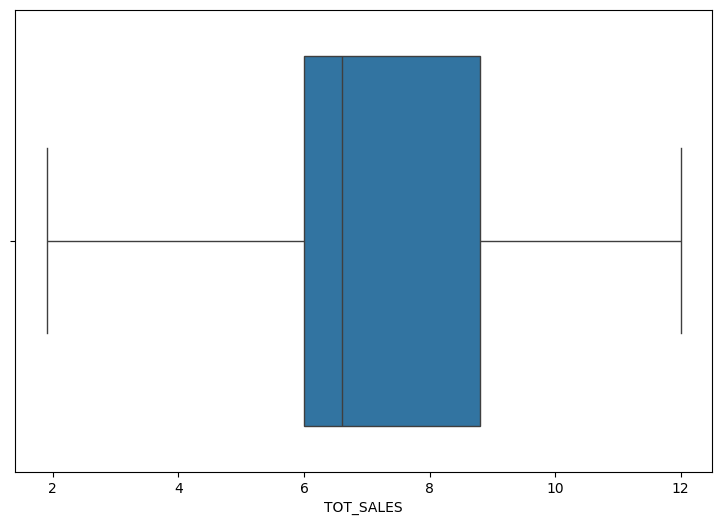

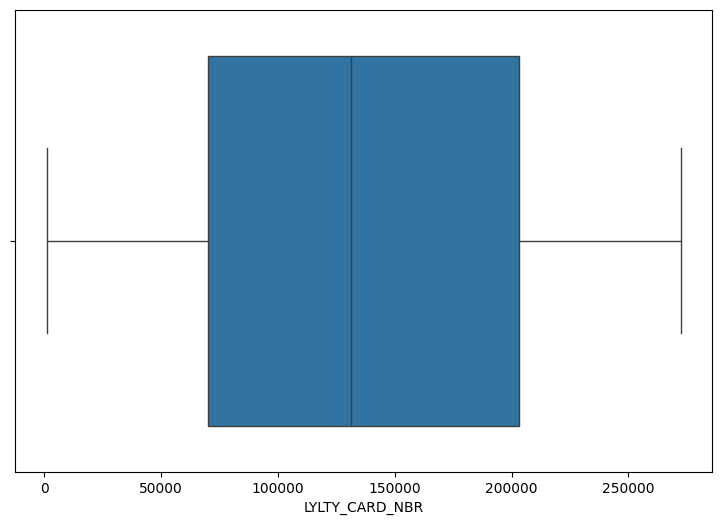

In [20]:
def check(col):
  sns.boxplot(x=col,data=df)
  plt.show()
check("TOT_SALES")
check("LYLTY_CARD_NBR")

In [21]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
5,2020-01-01,28,28041,24771,2,Cobs Popd Sour Crm&Chives Chips 110g,2,7.6,OLDER FAMILIES,Budget
7,2020-01-01,199,199028,197676,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Budget
14,2020-01-01,133,133114,136713,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,OLDER SINGLES/COUPLES,Budget
22,2020-01-01,271,271204,269423,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,OLDER SINGLES/COUPLES,Mainstream
24,2020-01-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,RETIREES,Premium


## 4. **Data Visualization**

1. **What are the total number of chips sold over a period of a year?**

The question will help us to identify in what month do we need to increase the chips stock quantity and in what month we need to reduce the importing of chips product.

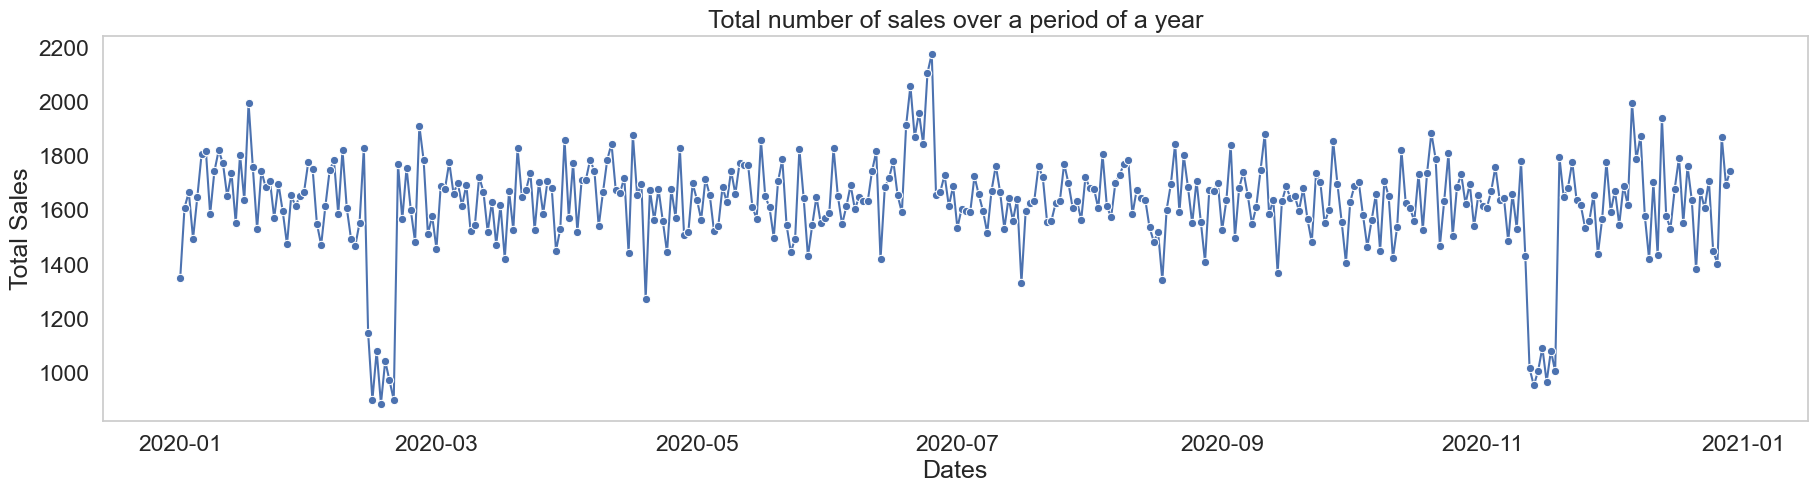

In [22]:
X = df.groupby("DATE")["TOT_SALES"].sum()
dt = X.keys()
sales = X.tolist()

sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize=(22,5))
sns.lineplot(x=dt, y = sales ,marker="o")
plt.title("Total number of sales over a period of a year")
plt.xlabel("Dates")
plt.ylabel("Total Sales")
plt.grid(axis="both")
plt.show()

The total number of chips sold in February to March and November to December have been enormously declined and the chips products are sold most in the near of christmas



---



2. **What are the total number of chips sold in individual stores?**

This question will help us to find the number of stores that have less sales of chips. so that we can either do some advertisement in those stores to increase the chips sales are we can either decrease the chips quantity as per the store needs.

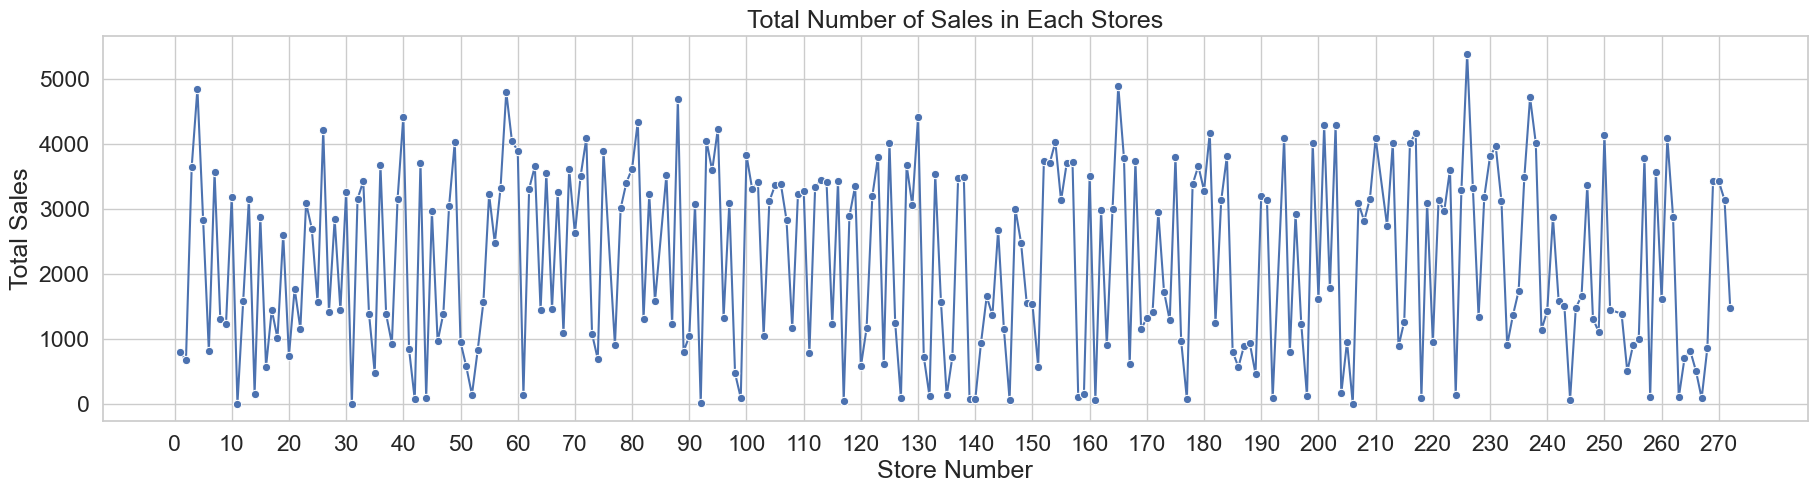

In [23]:
X = df.groupby("STORE_NBR")["TOT_SALES"].sum()
str_nbr = X.keys()
sales = X.tolist()

sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize=(22,5))
sns.lineplot(x=str_nbr, y = sales ,marker="o")
plt.xticks(range(0,272,10))
plt.title("Total Number of Sales in Each Stores")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

There are more number of stores that have low sales in form of chips



---



3 . **What are the total number of chip products sold?**

This question will help us to find that which product of chips are mostly sold and which are not, so that we can able to increase the quantity of the chips that are mostly sold and we can able to reduce the quantity of chips that are less sold.

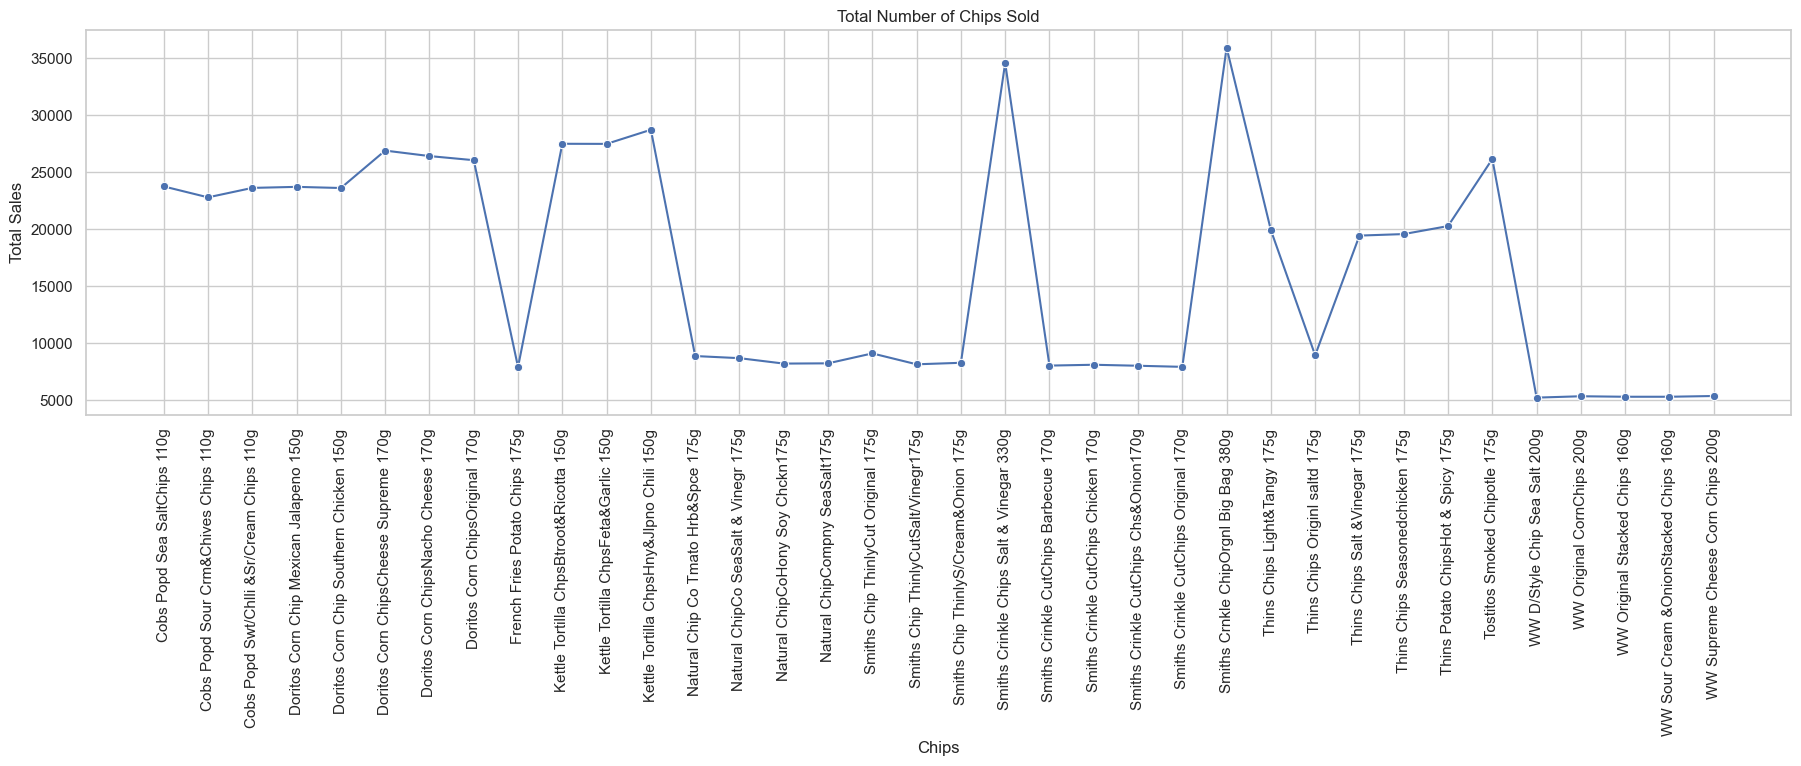

In [24]:
X = df.groupby("PROD_NAME")["TOT_SALES"].sum()
prod = X.keys()
sales = np.round(X.tolist())

sns.set(font_scale=1, style="whitegrid")
plt.figure(figsize=(22,5))
sns.lineplot(x=prod, y = sales,marker="o")
plt.title("Total Number of Chips Sold")
plt.xlabel("Chips")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In here **Smiths Cmkle Chips Original 380g** has been mostly sold. so that we can increase this product in stocks.



---



---



4. **Which Lifestage of people are intrested in what type of chips products?**

This question will help us to target the group of people who buys chips more, so that we can able to target the group of people we need.

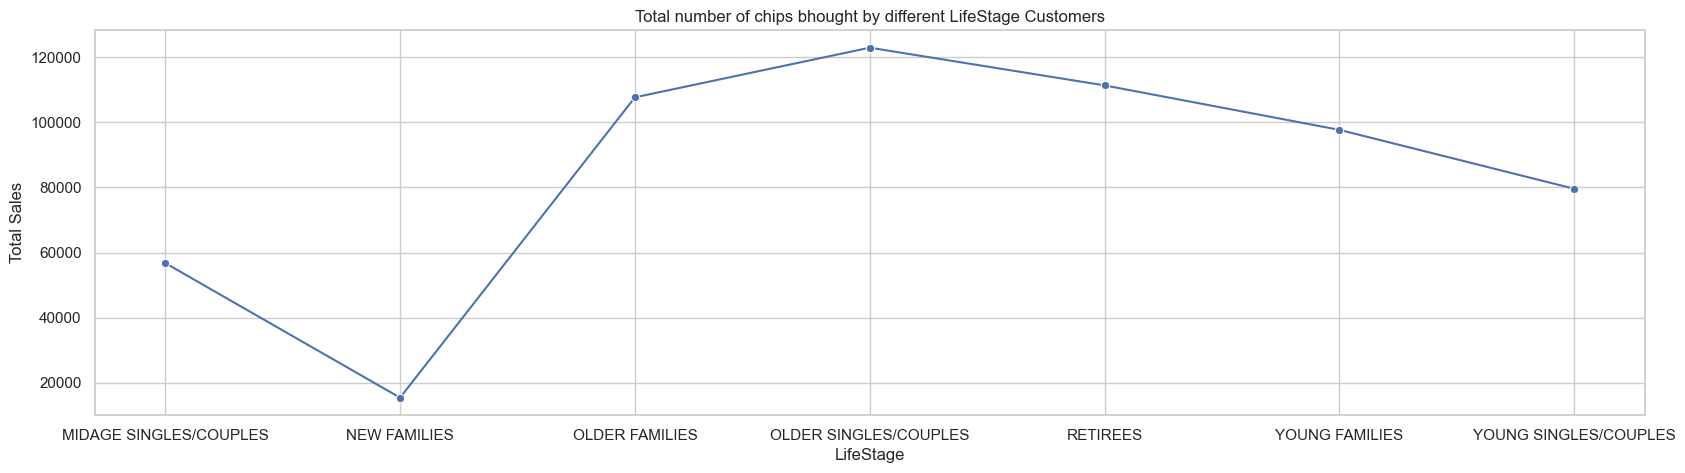

In [25]:
X = df.groupby("LIFESTAGE")["TOT_SALES"].sum()
lifestg = X.keys()
sales = X.tolist()
sns.set(font_scale=1, style="whitegrid")
plt.figure(figsize=(20,5))
sns.lineplot(x=lifestg, y = sales, marker="o")
plt.title("Total number of chips bhought by different LifeStage Customers")
plt.xlabel("LifeStage")
plt.ylabel("Total Sales")
plt.show()

It seems like **Older Families**  and **Older Singles/Couples** spend more on buying the chips, where else **New Families** spend little on buying the chips



---



---



5. **Which group of people loves what product of chips?**

This question will help us to find which group of people loves what product of chips so that it will be easy to target those group of people.

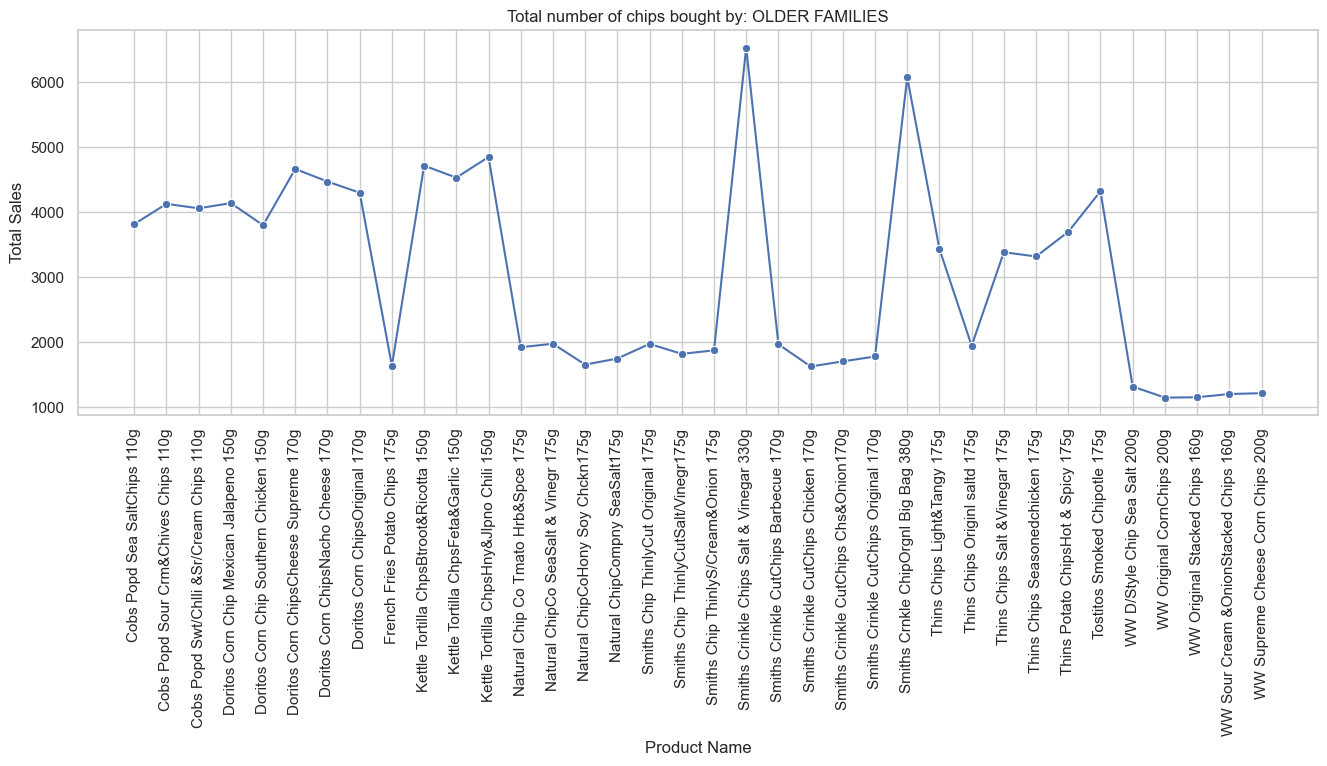

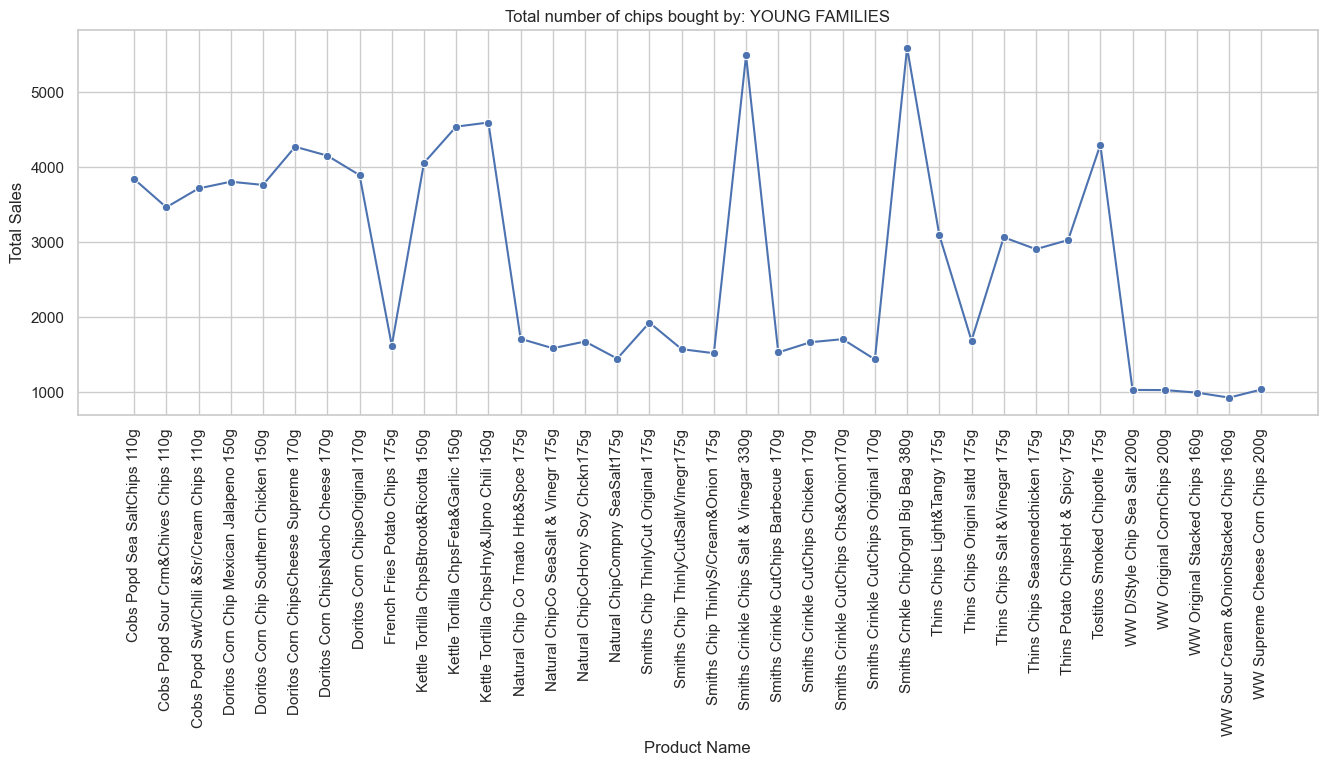

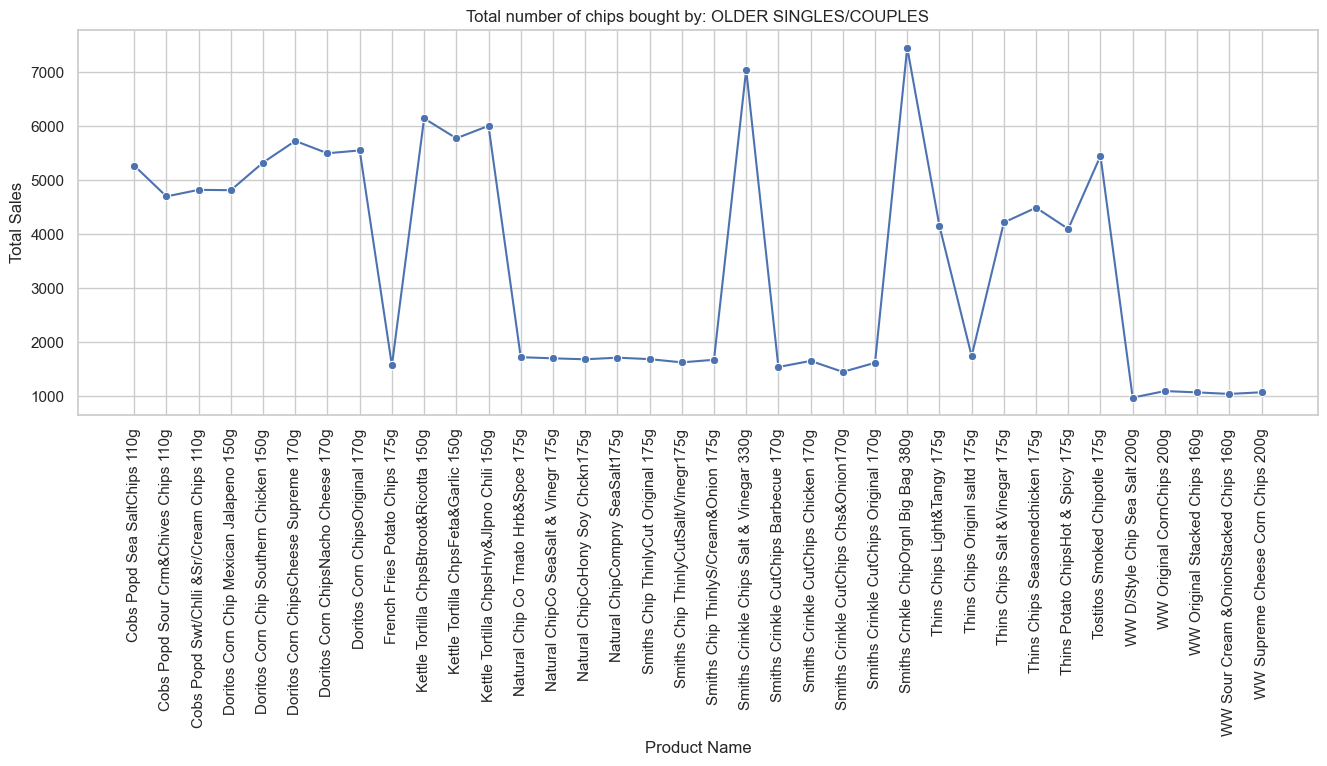

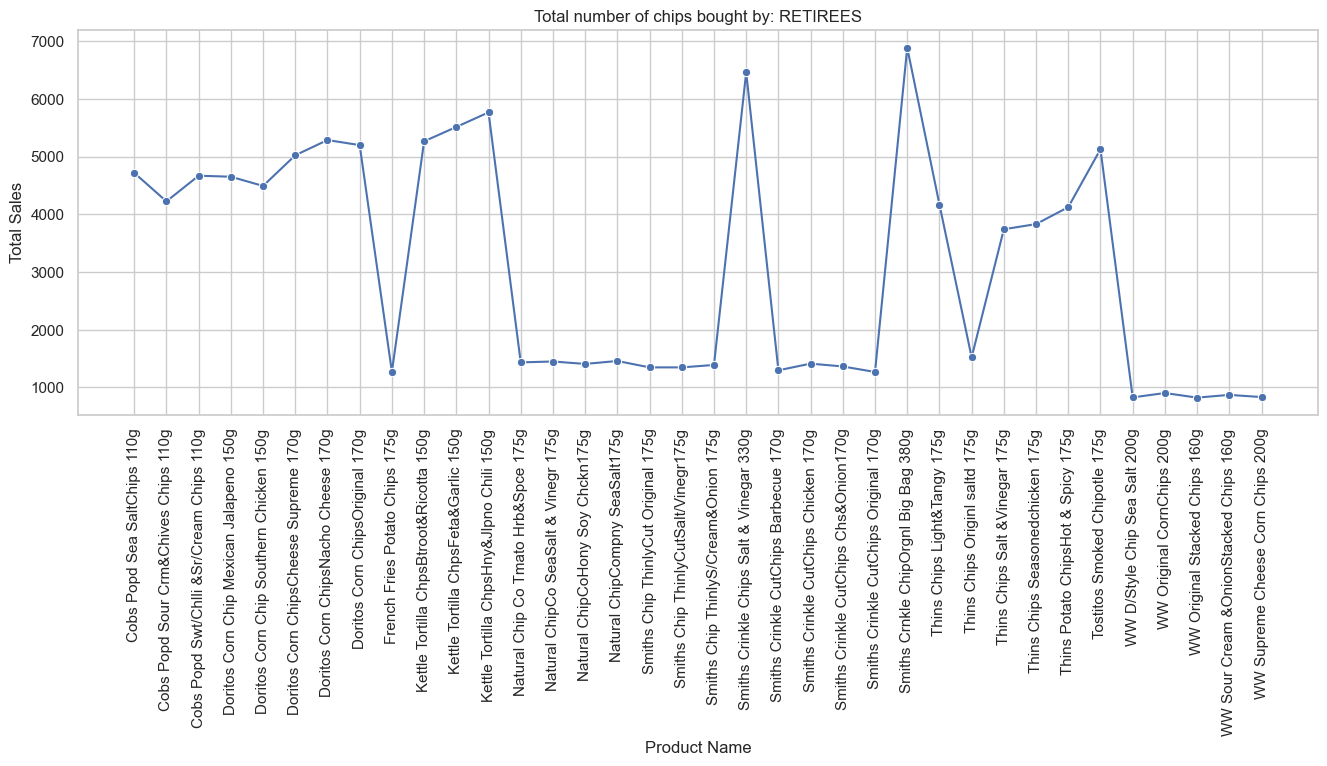

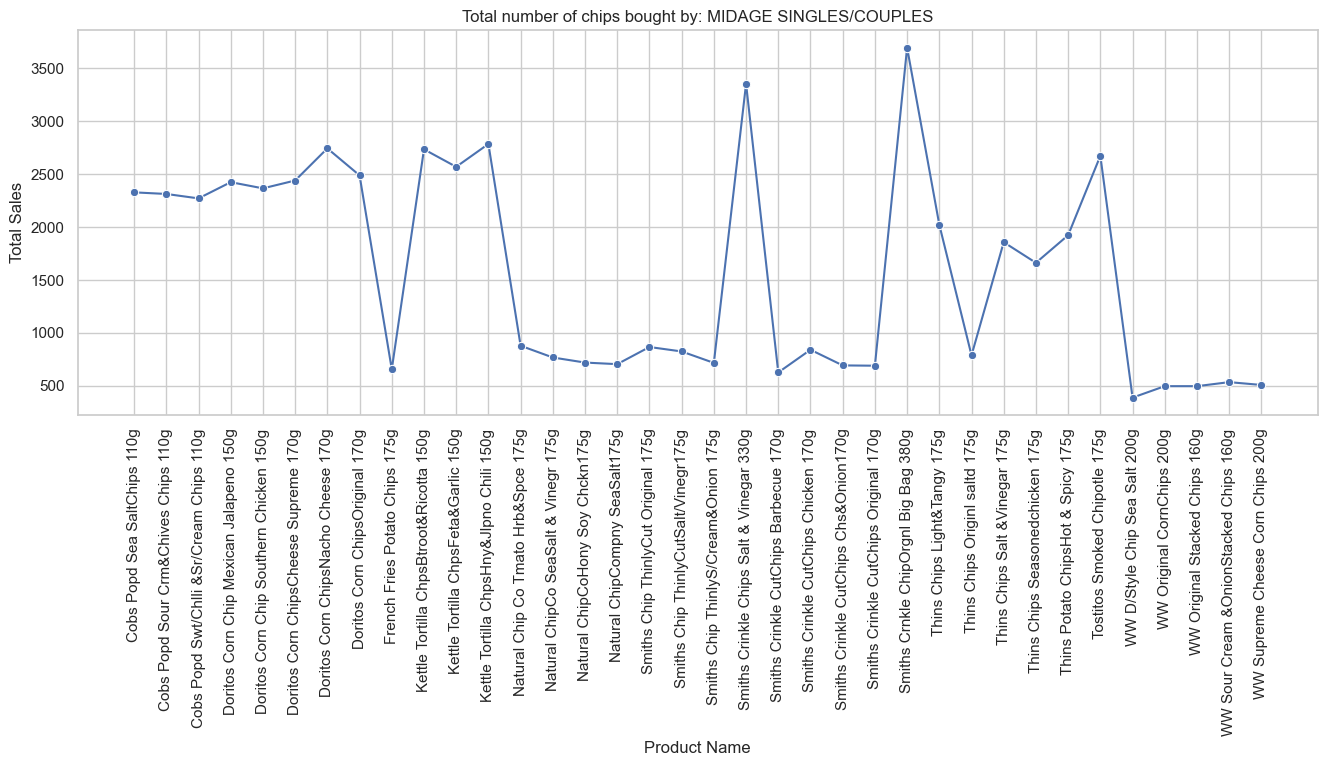

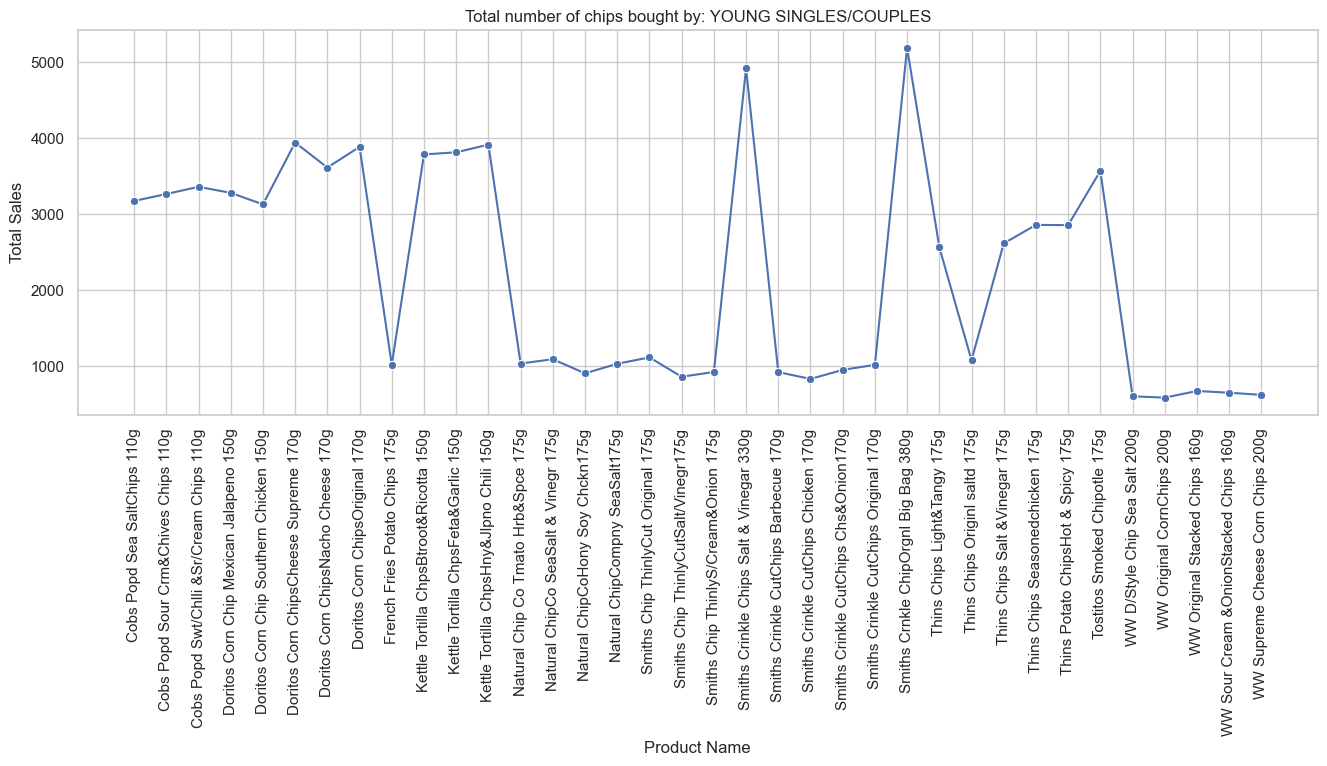

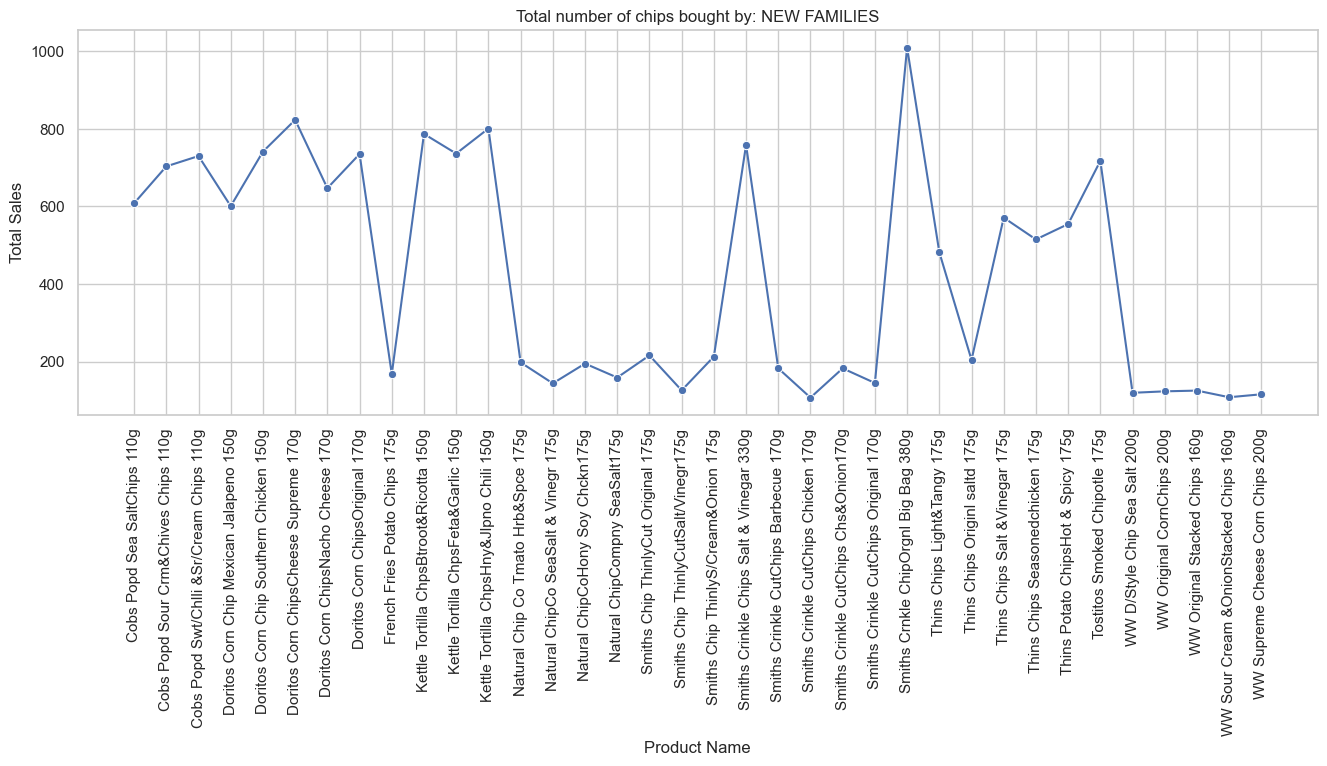

In [26]:
def life_stage(stage,prod_title):
  X =df[df["LIFESTAGE"] == stage ]
  Y = X.groupby("PROD_NAME")['TOT_SALES'].sum() 
  plt.figure(figsize=(16,5))
  plt.title("Total number of products sold")
  sns.lineplot(x = Y.keys(), y = Y.tolist(), marker = "o")
  plt.xticks(rotation=90)
  plt.title("Total number of chips bought by: "+ prod_title)
  plt.xlabel("Product Name")
  plt.ylabel("Total Sales")

  print()
  plt.show()
life_stage("OLDER FAMILIES","OLDER FAMILIES")
life_stage("YOUNG FAMILIES","YOUNG FAMILIES")
life_stage("OLDER SINGLES/COUPLES","OLDER SINGLES/COUPLES")
life_stage("RETIREES","RETIREES")
life_stage("MIDAGE SINGLES/COUPLES","MIDAGE SINGLES/COUPLES")
life_stage("YOUNG SINGLES/COUPLES","YOUNG SINGLES/COUPLES")
life_stage("NEW FAMILIES","NEW FAMILIES")

**The Most Sold Product From Each LifeStage and their Total Sales** 

1. OLDER SINGLES/COUPLES     : **Smiths Crnkle ChipOrgnl Big Bag 380g ==> 7446.0**
2. RETIREES                  : **Smiths Crnkle ChipOrgnl Big Bag 380g ==> 6891.0**
3. OLDER FAMILIES            : **Smiths Crinkle Chips SaltVinegar 330g ==> 6526.0**
4. YOUNG FAMILIES            : **Smiths Crnkle ChipOrgnl Big Bag 380g ==> 5593.0**
5. YOUNG SINGLES/COUPLES     : **Smiths Crnkle ChipOrgnl Big Bag 380g ==> 5192.0**
6. MIDAGE SINGLES/COUPLES     : **Smiths Crnkle ChipOrgnl Big Bag 380g ==> 3693.0**
7. NEW FAMILIES               : **Smiths Crnkle ChipOrgnl Big Bag 380g ==> 1009.0**

The chart shows that the products that are weigh high in grams are mostly bought.



---



---



6. **Which brand has the highest number of products?**

This question will help us to spend more advertisment on the product brands.

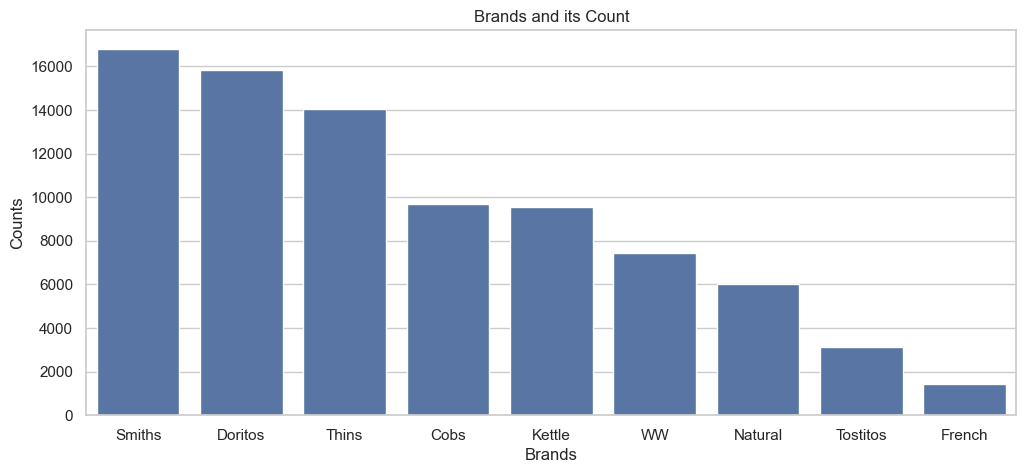

In [27]:
brands = df["PROD_NAME"].str.split(" ").str[0]
X = brands.value_counts().keys()
Y = brands.value_counts().tolist()

plt.figure(figsize=(12,5))
sns.barplot(x = X, y = Y)
plt.title("Brands and its Count")
plt.xlabel("Brands")
plt.ylabel("Counts")
plt.show()



---



---



7. **Which brand has the highest number of total sales in chips?**

This question will help us to find which brand has better performance and which doesn't.

C:\Users\anna\AppData\Local\Temp\ipykernel_63876\3321048262.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = brand_names, y = brand_sales,ci =None)


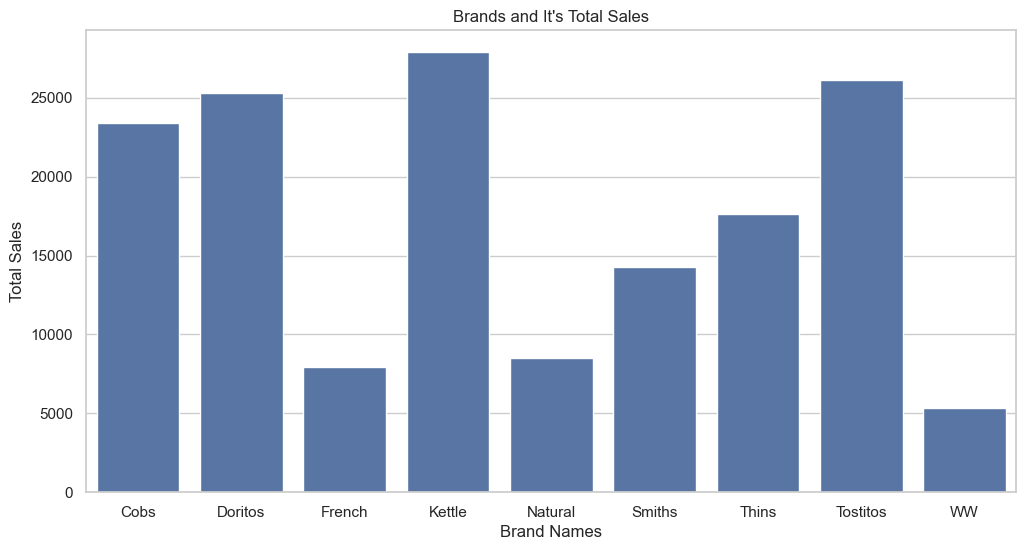

In [28]:
brand = df.groupby("PROD_NAME")["TOT_SALES"].sum()
brand_names = brand.keys().str.split(" ").str[0]
brand_sales = brand.tolist()

plt.figure(figsize=(12,6))
sns.barplot(x = brand_names, y = brand_sales,ci =None)
plt.title("Brands and It's Total Sales")
plt.xlabel("Brand Names")
plt.ylabel("Total Sales")
plt.show()

**Kettle brand** has the highest number of chips products sold followed by Tostitos,Doritos,Cobs, where as **WW** has the lowest chips products sold



---



8. **Customer spends for different LifeStage**

This question will help us to find the customer segmentation for different Lifestage of customers.




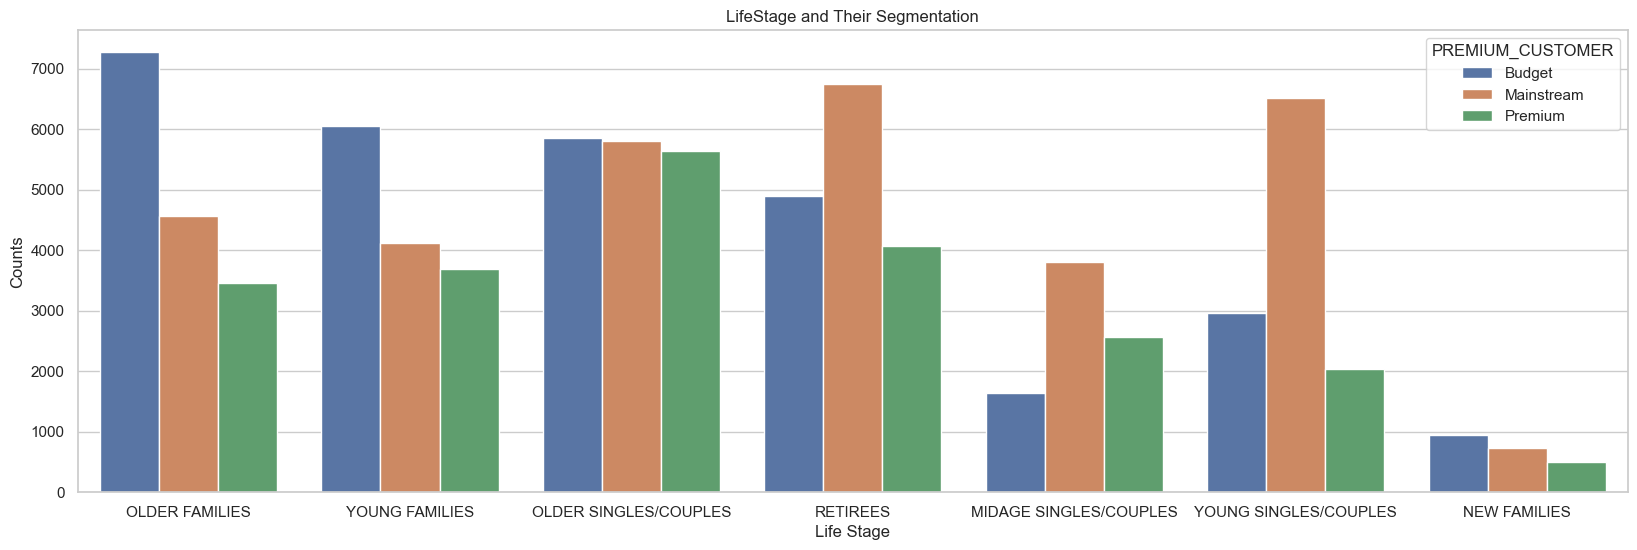

In [30]:
premiums = df[["LIFESTAGE", "PREMIUM_CUSTOMER", "TOT_SALES"]]

plt.figure(figsize=(20, 6))
sns.countplot(x="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=premiums)
plt.title("LifeStage and Their Segmentation")
plt.xlabel("Life Stage")
plt.ylabel("Counts")
plt.show()

In [31]:
df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum().sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              51318.7
YOUNG SINGLES/COUPLES   Mainstream          47476.6
RETIREES                Mainstream          47323.9
YOUNG FAMILIES          Budget              42678.5
OLDER SINGLES/COUPLES   Budget              41821.8
                        Mainstream          40984.1
                        Premium             40193.9
RETIREES                Budget              35038.4
OLDER FAMILIES          Mainstream          32296.6
YOUNG FAMILIES          Mainstream          29035.7
RETIREES                Premium             29033.2
MIDAGE SINGLES/COUPLES  Mainstream          27971.9
YOUNG FAMILIES          Premium             26003.6
OLDER FAMILIES          Premium             24104.5
YOUNG SINGLES/COUPLES   Budget              18963.7
MIDAGE SINGLES/COUPLES  Premium             17585.2
YOUNG SINGLES/COUPLES   Premium             13158.6
MIDAGE SINGLES/COUPLES  Budget              11199.9
NEW FAMILIES           



---



---



## **INSIGHTS**



*   Products of chips are likely to be **Decreased** in sales in the months of **Febraury and November** and **Increase** in sales in Near Summer holidays and Christmas i.e **March & December**

*   Chips products are sold higher in the month of **July**

*   Multiple Number of stores have less sales in chips

*   **Smiths Cmkle Chips Original 380g** is the **most sold** chip product.

*   **WW Original CornChips 200g**  is the **least sold** chip product.

*   **Older Families and Older Singles/Couples** spend more on buying the chips products.

*   **New Families** spend little on buying the chips products.

*   **OLDER SINGLES/COUPLES** bought more in the **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spend upto **$7446.0**.

*   **RETIREES** bought more in the **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spend up to  **$6891.0**.

*   **OLDER FAMILIES** bought more in the **Smiths Crinkle Chips SaltVinegar 330g** product, which they spend upto **$6526.0**.

*   **YOUNG FAMILIES** bought more in the **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spend upto **$5593.0**.

*   **YOUNG SINGLES/COUPLES** bought more in the **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spend upto **$5192.0**.

*  **MIDAGE SINGLES/COUPLES** bought more in the **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spend upto **$3693.0**.

*  **NEW FAMILIES** bought more in the **Smiths Crnkle ChipOrgnl Big Bag 380g** **$1009.0**.


*   **Kettle brand** has the highest number of chips products sold followed by Tostitos,Doritos,Cobs.

*   **WW brand** has the lowest chips products sold.




  **Top 5 LifeStage and their Customer Type that Spends more money in buying chips products.** 

  *  OLDER FAMILIES        **:**  Budget     **:**         **$51318.7**

  *  YOUNG SINGLES/COUPLES  **:**  Mainstream     **:**  **$47476.6**

  *  RETIREES               **:**  Mainstream       **:**    **$47323.9**

  *  YOUNG FAMILIES         **:**  Budget           **:**    **$42678.5**

  *  OLDER SINGLES/COUPLES  **:**  Budget            **:**   **$41821.8**


 **Least 5 Lifastage people and segments that spend money on buying chips**

*  YOUNG SINGLES/COUPLES   **:** Premium        **:**      **$13158.6**

*  MIDAGE SINGLES/COUPLES **:**  Budget         **:**      **$11199.9**

*  NEW FAMILIES         **:**    Budget           **:**     **$6612.8**

*  NEW FAMILIES         **:**    Mainstream       **:**     **$5198.9**

*  NEW FAMILIES          **:**   Premium            **:**   **$3538.1**






## **RECOMMENDATIONS**

*   The chips are mostly sold in the month of **July and near christmas**, so increasing the inventory in these months will help.

*  **OLDER FAMILIES:**

    *   We can focus on **Premium** segmentation has they have the lowest purchase of  **$24104.5**.

    *   **OLDER FAMILIES** are most likely to buy  **Smiths Crinkle Chips SaltVinegar 330g** product, which they spend upto **$6526.0.**

*  **OLDER SINGLES/COUPLES:**

   * We can focus on **Premium** segmentation has they have the lowest purchase of  **$40193.9**.

   * **OLDER SINGLES/COUPLES** are most likely to buy **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spend upto **$7446.0.**


*  **MIDAGE SINGLES/COUPLES:**

   *  We can focus of **Budget** segmentation has they have the lowest purchase of **$11199.9**

   * **MIDAGE SINGLES/COUPLES** most likely to buy **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spend upto **$3693.0.**


* **NEW FAMILIES:** 

    * **New Families** are the least buyers of chips in the entire lifestage category, so that we can focus on new families to improve the chips sales.

    * **NEW FAMILIES** are mostly likely to buy **Smiths Crnkle ChipOrgnl Big Bag 380g** product, which they spent upto **$1009.0.**


* **PRODUCTS**
 
  *  The products which weigh the most are mostly sold higher in the price.

  * We can able to reduce the cost of advertisement in the categories which the products are mostly selling.

  * We need to focus in advertising the products which performance less in terms of sales.

# **THANK YOU**

[**Github**](https://github.com/rameshkumars12) : https://github.com/rameshkumars12